# Imports

In [2]:
from ucimlrepo import fetch_ucirepo 

import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load Data

In [4]:
# Load dataset 
data = fetch_ucirepo(id=2) 

# Conver to DF
X = data.data.features
y = data.data.targets
df = pd.concat([X, y], axis=1)

# Display basic information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  4

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Save data to disk (optional)

In [7]:
df.to_csv(f'tabular_data_{datetime.datetime.now().strftime("%Y_%m_%d")}.csv', index=False)

# EDA and Preprocessing

### Correct column names

In [10]:
df.columns = df.columns.str.lower().str.replace('-', '_')
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### Value counts

In [12]:
for col in df.columns:
    print(f"\nValue Counts for '{col}':\n")
    print(df[col].astype(str).value_counts())
    print()


Value Counts for 'age':

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


Value Counts for 'workclass':

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
nan                   963
Without-pay            21
Never-worked           10
Name: count, dtype: int64


Value Counts for 'fnlwgt':

fnlwgt
203488    21
120277    19
190290    19
125892    18
126569    18
          ..
286983     1
185942     1
234220     1
214706     1
350977     1
Name: count, Length: 28523, dtype: int64


Value Counts for 'education':

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       83

### Encode target variable

In [14]:
# Clean the income column by stripping spaces and removing periods
df['income'] = df['income'].str.replace('.', '', regex=False).str.strip()

# Encode '>50K' as 1 and '<=50K' as 0
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})
df['income'].value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

### Drop redundant columns

In [16]:
'''
1. education is encoded by education-num

2. fnlwgt = weighting factor that is used to adjust the sample so that it more closely represents the general population
    we aren't interested in this feature for this experiment (only needed if we wanted to explore on population level)
'''

columns_to_drop = ['education', 'fnlwgt'] 
df = df.drop(columns=columns_to_drop)

### Dealing with missing data

In [18]:
# Check for missing values
print(df.isnull().sum())

# The dataset has native class for missing data: "?"
df = df.fillna('?')

age                 0
workclass         963
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64


In [19]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Encodings of categorical values

In [21]:
# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['relationship', 'marital_status', 'race', 'sex'], drop_first=True)
df.columns = df.columns.str.lower().str.replace('-', '_') # lower case and use _ instead of -

# Integer Encoding for workclass, occupation, and native-country
encoder = LabelEncoder()

# Apply integer encoding
df['workclass'] = encoder.fit_transform(df['workclass'])
df['occupation'] = encoder.fit_transform(df['occupation'])
df['native_country'] = encoder.fit_transform(df['native_country'])

# Convert boolean columns to integers
df = df.astype(int)

In [22]:
df.head()

,age,workclass,education_num,occupation,capital_gain,capital_loss,hours_per_week,native_country,income,relationship_not_in_family,...,marital_status_married_civ_spouse,marital_status_married_spouse_absent,marital_status_never_married,marital_status_separated,marital_status_widowed,race_asian_pac_islander,race_black,race_other,race_white,sex_male
0,39,7,13,1,2174,0,40,39,0,1,...,0,0,1,0,0,0,0,0,1,1
1,50,6,13,4,0,0,13,39,0,0,...,1,0,0,0,0,0,0,0,1,1
2,38,4,9,6,0,0,40,39,0,1,...,0,0,0,0,0,0,0,0,1,1
3,53,4,7,6,0,0,40,39,0,0,...,1,0,0,0,0,0,1,0,0,1
4,28,4,13,10,0,0,40,5,0,0,...,1,0,0,0,0,0,1,0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   48842 non-null  int32
 1   workclass                             48842 non-null  int32
 2   education_num                         48842 non-null  int32
 3   occupation                            48842 non-null  int32
 4   capital_gain                          48842 non-null  int32
 5   capital_loss                          48842 non-null  int32
 6   hours_per_week                        48842 non-null  int32
 7   native_country                        48842 non-null  int32
 8   income                                48842 non-null  int32
 9   relationship_not_in_family            48842 non-null  int32
 10  relationship_other_relative           48842 non-null  int32
 11  relationship_own_child                488

### Ratio scale data

In [25]:
# List of columns to scale (all columns except 'income')
numeric_cols = df.columns[df.columns != 'income']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features and update the DataFrame
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

## Plots

### Histogram

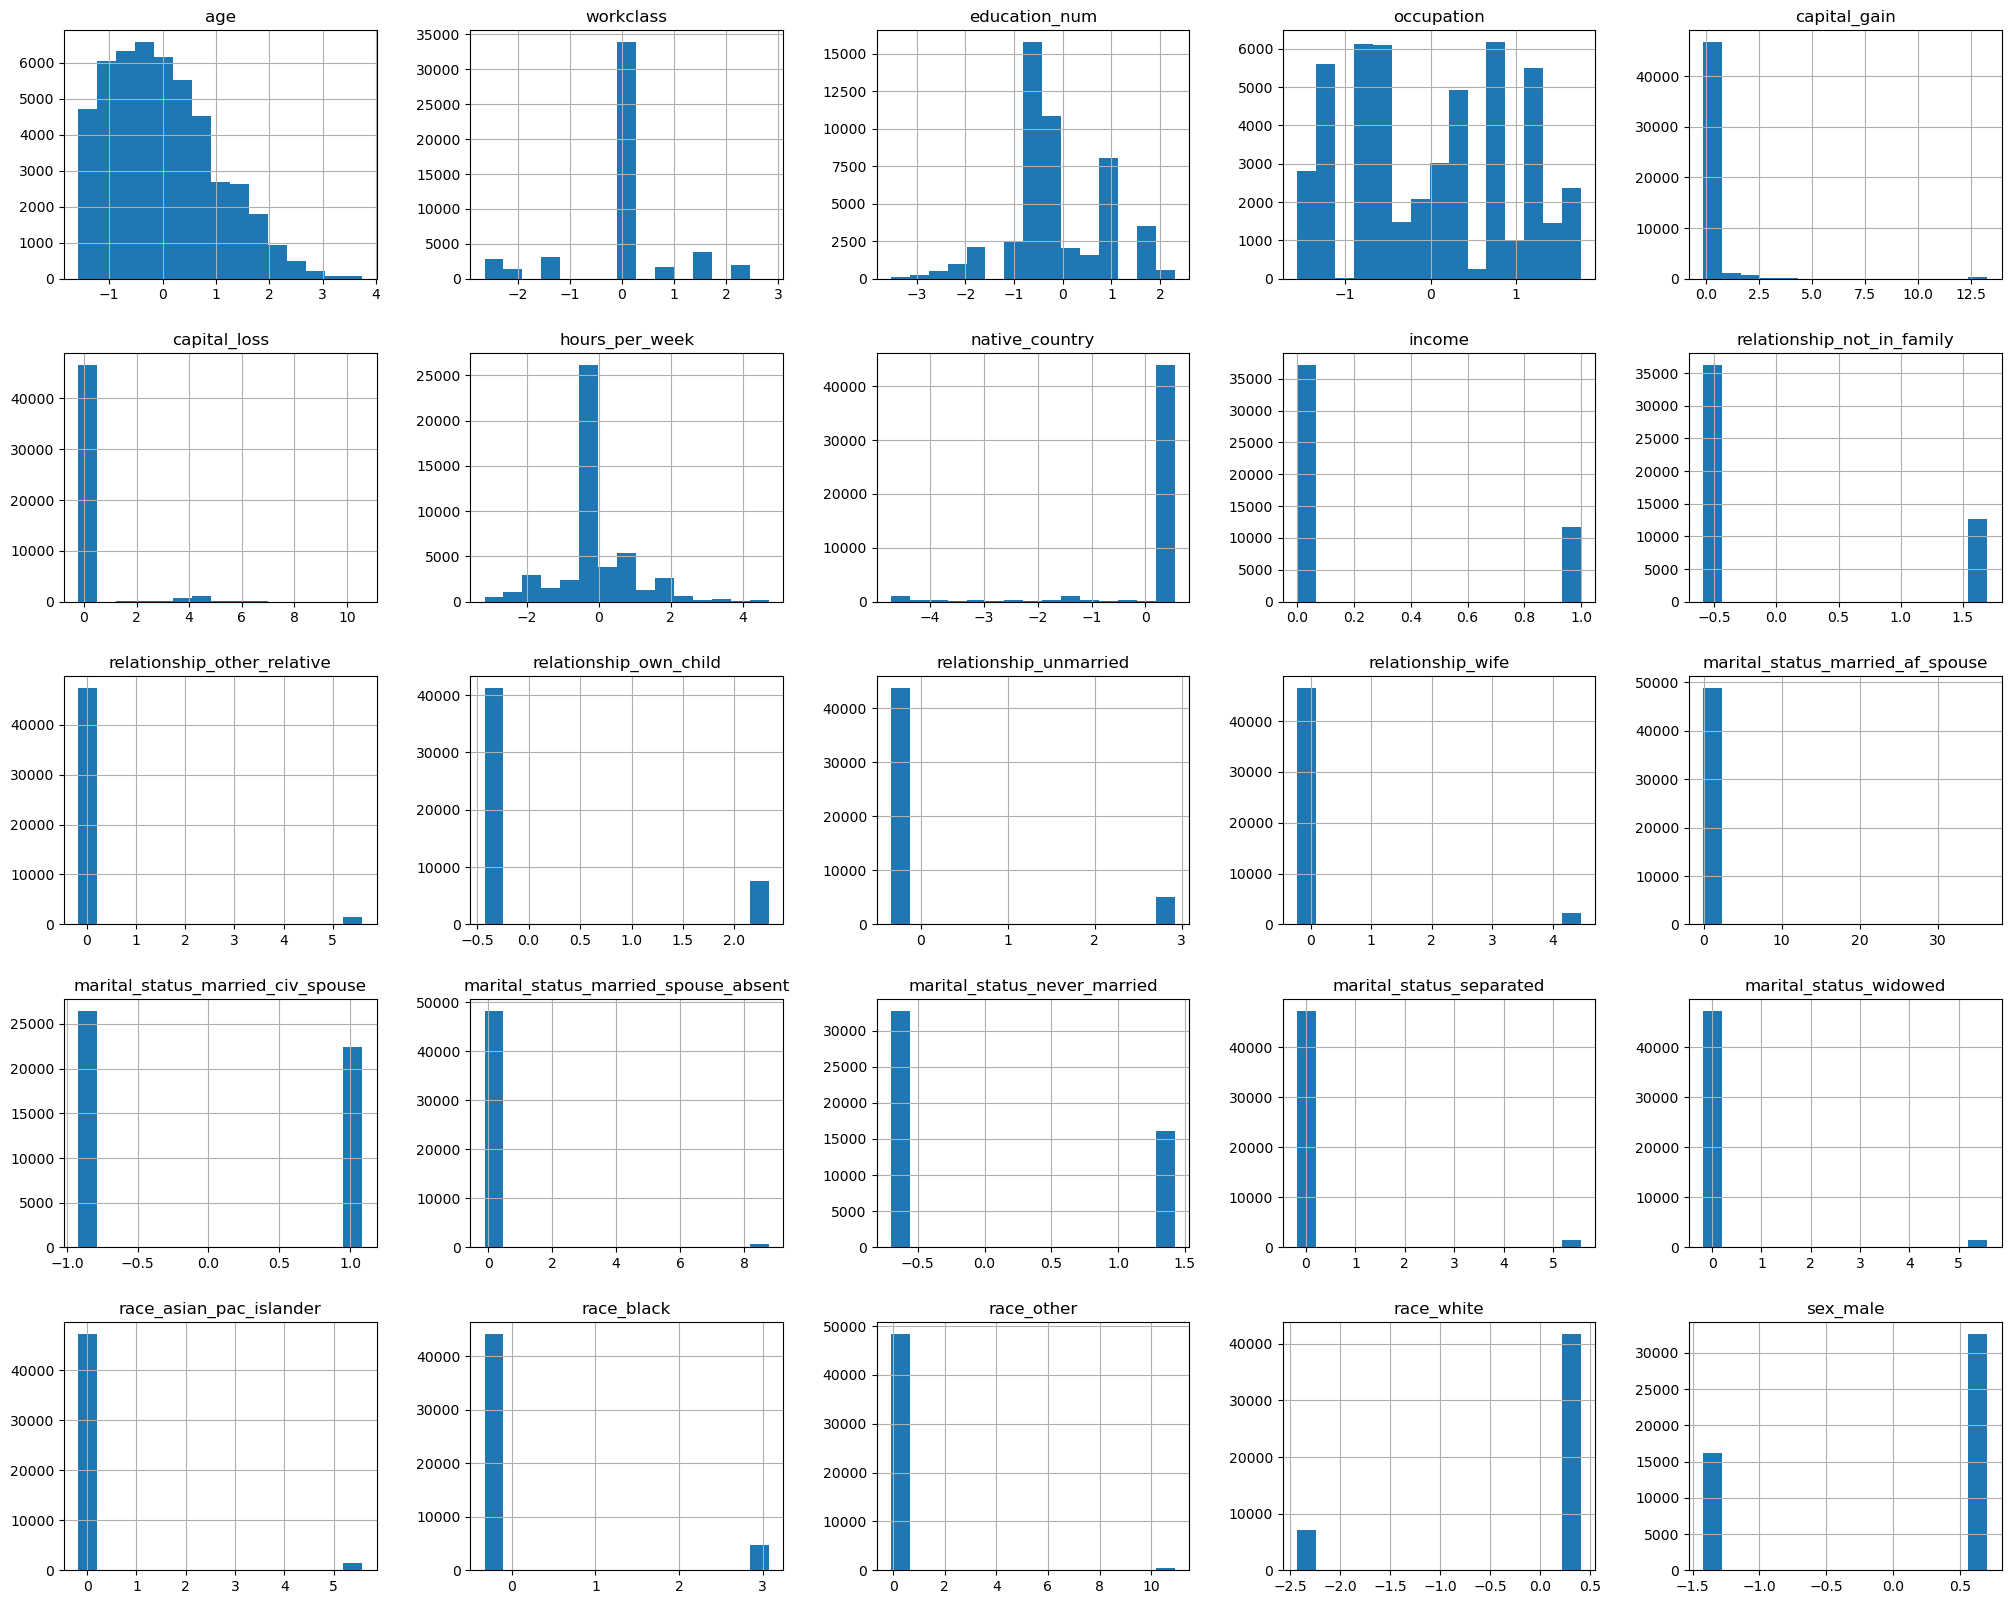

In [28]:
df.hist(bins=15, figsize=(25, 20))
plt.show()

# Save preprocessed df

In [30]:
df.to_csv(f'tabular_data_preprocessed_{datetime.datetime.now().strftime("%Y_%m_%d")}.csv', index=False)